# To Do

- Explain where HITL file `annotations.csv` file came from
- Explain what is in README.txt in ../data/rca/fluor/osb/2018
- Links to datasets includes a sorta spurious one at the top... get rid of that
- Used the Python comment `# save` to indicate where dataset saves should go (or exist)
    - Code is something like this: 
    
```
# df = D.to_dataframe()     # just under 72k rows by 43 columns; revise with [[]] notation to reduce column count
# df = df.to_csv('BioOptics_Figure1_2021_03_10_72k_rows_by_43_columns.csv')
```

- Somewhere near the top should indicate correspondence to flowchart /pseudo
- HITL runs for 2021 and 2019 but not 2018 so add that
    - And maybe add some diagnostic code printing annotation remarks
- Normalize all references to 2019 since it got pulled
- Double-check the offsets between cast and profile for 2018
- Very much gloss over the profile business


# Introduction and Overview

## Key links

* [OOI Quality Control](https://ooi-website.whoi.edu/quality-control/)
* [OOI Data](https://oceanobservatories.org/tag/data/)
* [OOI Data Explorer](https://dataexplorer.oceanobservatories.org/#ooi/array/RS/platform_type/profiling-assets/annotations?instrument_type_id=FLUOR)
* [Notebook: OOI QC flags by Peter Cable](https://github.com/petercable/shared_notebooks/blob/master/qc_flags/qc_flags.ipynb)
* [Notebook: OOI Data Explorer and Python by Chris Wingard](https://github.com/oceanobservatories/ooi-data-explorations/tree/master/python)
* [Notebook: HITL (Human In The Loop) by Chris Wingard](https://github.com/oceanobservatories/ooi-data-explorations/blob/master/python/examples/notebooks/dosta/ooiea_dosta_annotations_hitl_qc.ipynb)


## Temporary links


* [Flowcharts](https://docs.google.com/presentation/d/1WuEsncfrxf_43osxAL-2g6dew1qh0wcXf2Lg5vNwCas/edit?pli=1#slide=id.g142d4c244fd_0_124)
* [FLORT Flowchart](https://docs.google.com/drawings/d/1CYWFAGMNZQa8W3xFslrI9uXyHW78q24KhBOhiTMUz98/edit)
* [Pseudo-code](https://docs.google.com/document/d/1gQhFzkthh-S116F_p32hoF_uw22MB3mKF3DKyUtmIxw/edit#)


## Notebook mechanics

There are three file locations to be aware of when using this repository.


- The repository root directory: Includes this notebook
- Sub-folders within this repositor e.g. the **`Discrete Summaries`** folder
- Parent directory external to this repository **`../`**: Includes **`../data`**
    - Repository size is limited; larger datasets (> 100MB) are located externally
    - Example: **`../data/rca/fluor/osb/2021/flort_fullres.nc`** 


### Python code


This notebook uses 'helper' Python code located in `DataQualityGuideModule.py`
(root folder).


## Data summary


This notebook follows the QC narrative for biooptics. 
It is concerned with fluorometer data, most particularly Chlorophyll-A fluorescence. 
The objective is to produce  draft figures for the OOI QC Data Guide. 
Here we focus on a fluorometer triplet (**`flort`**) deployed on the 
Regional Cabled Array (RCA) "Oregon Slope Base" (OSB) shallow profiler.
This profiler is at rest on a platform at a depth of approximately 200 meters.
Nine times per day -- by means of a winch and cable -- it performs an ascent/descent 
cycle over the course of about one hour. The profilers depth hence ranges from
200 meters to 10 meters, generally encompassing the photic zone of the upper 
water column. 


The time frames of concern are 2018, 2019 and 2021.



## Full resolution data

We begin with source data acquired at the maximum sampling rate.
For the fluorometer triplet this is approximately one sample per second.


### The **`oceanobservatories.org`** Data Explorer


- [OOI Data Explorer, Oregon coast, RCA, Oregon Slope Base, Profiler](https://dataexplorer.oceanobservatories.org/#ooi/array/RS/platform_type/profiling-assets/data?instrument_type_id=FLUOR)
- [Full resolution Downloads link](https://dataexplorer.oceanobservatories.org/#ooi/array/RS/platform_type/profiling-assets/downloads?instrument_type_id=FLUOR) 
    - Emphasis: Not the **Downloads** button but the hyperlink text below it
- [Downloads page](https://dataexplorer.oceanobservatories.org/#metadata/104289/station/2000/sensor/downloads)
    - Identify a date range from the right-hand column
    - Note a corresponding deployment number e.g. `0004`
    - The green **Downloads** button opens a pop-up menu
    - Select the THREDDS catalog green **Dataset** button 
    - ...to a Catalog page listing many datasets
        - 'Gold standard' NetCDF files, left-click to download
        - Downloadable file naming format example:


```
deployment0004_RS01SBPS-SF01A-3A-FLORTD101-streamed-flort_d_data_record_20180316T120001.026661-20180321T001400.055700.nc
```


        - Tips on selecting the desired file
            - Scroll down to the deployment of interest e.g. **`deployment0004`**
            - Verify the asset code e.g. **`RS01SBPS-SF01A`** == RCA OSB shallow profiler
            - Identify the desired instrument file e.g. **`FLORT`**
            - Verify time range e.g. **`20180316 ... 20180321`**
            - Verify file extension is `.nc` (NetCDF)

In [31]:
# External to repository: The ../data/ folder has sub-folders to keep source data
#   organized. The heirarchy is /rca for Regional Cabled Array, then /fluor for
#   fluorometery, then /osb for Oregon Slope Base shallow profiler, and finally
#   three year folders /2018, /2019, /2021. 

print("\nYear-folders:\n")
!ls -al ../data/rca/fluor/osb/
print("\nExample: 2018 Full-resolution data:\n")
!ls -al ../data/rca/fluor/osb/2018/


Year-folders:

total 20
drwxr-xr-x 5 kilroy kilroy 4096 Oct 30 11:33 .
drwxr-xr-x 3 kilroy kilroy 4096 Aug  6 13:12 ..
drwxr-xr-x 2 kilroy kilroy 4096 Aug 16 08:39 2018
drwxr-xr-x 2 kilroy kilroy 4096 Aug 16 08:38 2019
drwxr-xr-x 2 kilroy kilroy 4096 Aug 16 08:35 2021

Example: 2018 Full-resolution data:

total 107836
drwxr-xr-x 2 kilroy kilroy      4096 Aug 16 08:39 .
drwxr-xr-x 5 kilroy kilroy      4096 Oct 30 11:33 ..
-rw-r--r-- 1 kilroy kilroy        44 Aug 16 08:39 README.txt
-rwxrwxrwx 1 kilroy kilroy 110409932 Aug 15 20:58 flort_fullres.nc


## Links to datasets for 2018, 2019, 2021


- [RCA OSB Shallow Profiler CDOM full resolution dataset](https://dataexplorer.oceanobservatories.org/#metadata/104289/station/2000/sensor/downloads)

Maintenance cruises run each summer to update the RCA. During these cruises a number
of rosette casts are made to recover water samples at various depths. These are 
designated by numbers, as in 2018 CTD cast 002. Here are the details for casts
specifically at OSB, near (within 1 km of) the shallow profiler site. The objective
is to identify cast data for comparison with shallow profiler data.

### 2018

Three casts  at OSB: 002, 006, 008, respectively June 26, July 10 and July 10.


```
OSB SP: CTD-002, JUN 26    20:23 UTC, 500m W
OSB SP: CTD-006, JUL 10    20:45 UTC, 250m W 
OSB SP, CTD-008, JUL 10    22:43 UTC, 500m W
```


The shallow profiler is sporadic after extended down time.
(See 
[the OOI Data Explorer time series record](https://dataexplorer.oceanobservatories.org/#metadata/104289/station/187/sensor/data?start=2018-06-24T06:56:38Z&end=2018-07-01T00:25:27Z))


```
JUN 24: 16:00 to JUN 24: 24:00 (about six profiles)
JUN 25: 14:00 to JUN 28: 02:00
JUN 28: 16:00 to JUN 29: 24:00
JUN 30: 11:00 to JUN 30: 13:00 (one profile)
JUL 10: 17:00 to JUL 13: 23:00
JUL 14: 05:00 to AUG 10: 21:00
```

### 2019


Date of interest: June 14, 2019


- [Green 'Downloads'; Deployment 0006, THREDDS catalog, choose Dataset](http://thredds.dataexplorer.oceanobservatories.org/thredds/catalog/ooigoldcopy/public/RS01SBPS-SF01A-3A-FLORTD101-streamed-flort_d_data_record/catalog.html)
    - Opens a new browser tab. As described above: Identify the desired download
        - In this case [deployment0006 ... FLORTD101 ... 20190614 ...nc](https://thredds.dataexplorer.oceanobservatories.org/thredds/catalog/ooigoldcopy/public/RS01SBPS-SF01A-3A-FLORTD101-streamed-flort_d_data_record/catalog.html?dataset=ooigoldcopy/public/RS01SBPS-SF01A-3A-FLORTD101-streamed-flort_d_data_record/deployment0006_RS01SBPS-SF01A-3A-FLORTD101-streamed-flort_d_data_record_20190410T120000.534756-20190614T051241.816166.nc)
        - [Use the HTTPServer link](/thredds/fileServer/ooigoldcopy/public/RS01SBPS-SF01A-3A-FLORTD101-streamed-flort_d_data_record/deployment0006_RS01SBPS-SF01A-3A-FLORTD101-streamed-flort_d_data_record_20190410T120000.534756-20190614T051241.816166.nc)


### 2021


Dates of interest: March 2021, particularly March 10. As above:


- [Green Downloads, Deployment - 0008, THREDDS catalog, choose Dataset](http://thredds.dataexplorer.oceanobservatories.org/thredds/catalog/ooigoldcopy/public/RS01SBPS-SF01A-3A-FLORTD101-streamed-flort_d_data_record/catalog.html). 
    - [deployment0008 ... FLORTD101 ... 20210123 ... 20210414 ... nc](https://thredds.dataexplorer.oceanobservatories.org/thredds/catalog/ooigoldcopy/public/RS01SBPS-SF01A-3A-FLORTD101-streamed-flort_d_data_record/catalog.html?dataset=ooigoldcopy/public/RS01SBPS-SF01A-3A-FLORTD101-streamed-flort_d_data_record/deployment0008_RS01SBPS-SF01A-3A-FLORTD101-streamed-flort_d_data_record_20210123T120000.228181-20210414T115959.167518.nc)
- [HTTPServer link](/thredds/fileServer/ooigoldcopy/public/RS01SBPS-SF01A-3A-FLORTD101-streamed-flort_d_data_record/deployment0008_RS01SBPS-SF01A-3A-FLORTD101-streamed-flort_d_data_record_20210123T120000.228181-20210414T115959.167518.nc)


## Run the next cell

In [4]:
# Import helper code, verify Python 
from DataQualityGuideModule import *
print('\nJupyter running Python {}'.format(sys.version_info[0]))


Jupyter running Python 3


## Dataset Preparation

Data are managed in code using Python XArray *Datasets* and *DataFrames*. 
Source data from `flort_fullres.nc` files are read as Dataset `D`.
The process objective is to arrive at six figures.


1. Examine data
2. Data cleaning: Drop bad data
3. Data cleaning: Manual intervention
4. Particulate backscatter
5. Chlorophyll-A dark correction
6. Comparison with cast 'Discrete Summary' data


## Figure 1. Examine data

- Open the RCA OSB shallow profiler fluorometer triplet data (chlor-a, fdom/cdom and backscatter) as **`D`**.
- Substitute time for 'observation number' as the primary dimension
- Reduce time range to March 2021 (2.7e6 seconds)
- Eliminate NaN values
- Rename the three sensor Data Variables
- Print dataset attributes
    - One Dimension: time
    - Five Coordinates including time and depth of the profiler
    - 39 Data Variables: 3 sensors plus 36 ancillary
        - Eight Quality Control (QC) flags (4 x executed / results pairs)
        - Seawater temperature and salinity
        - For calculating particulate scattering: seawater_scattering_coefficient
    - 68 ancillary Attributes (metadata)

In [6]:
D = xr.open_dataset('../data/rca/fluor/osb/2021/flort_fullres.nc')
D = D.swap_dims({'obs':'time'})
print('N-data, full dataset:', len(D.time))
D = D.sel(time=slice(dt64('2021-03-01'), dt64('2021-04-01')))
print('N-data, March 2021 (2678400 seconds):', len(D.time))
D = D.dropna('time')
print('N-data, post drop NaN:', len(D.time))
D = D.rename( {'fluorometric_cdom':          'fdom',
               'fluorometric_chlorophyll_a': 'chlora',
               'optical_backscatter':        'backscatter'})
print(D)

N-data, full dataset: 5830998
N-data, March 2021 (2678400 seconds): 2231042
N-data, post drop NaN: 2231042
<xarray.Dataset>
Dimensions:                                          (time: 2231042)
Coordinates:
    obs                                              (time) int32 2627967 ......
    lon                                              (time) float64 ...
    lat                                              (time) float64 ...
    depth                                            (time) float64 ...
  * time                                             (time) datetime64[ns] 20...
Data variables: (12/39)
    practical_salinity                               (time) float64 33.87 ......
    fluorometric_chlorophyll_a_qc_results            (time) uint8 12 12 ... 12
    fdom                                             (time) float64 1.3 ... 1...
    signal_3_offset                                  (time) float32 0.0 ... 0.0
    fluorometric_cdom_qc_executed                    (time) uint8 29 29

Fluorometer triplet data are, in sequence: Chlorophyll-A, Backscatter and FDOM/CDOM. 
These are presented as three charts. 

In [8]:
# save
# df = D.to_dataframe()     # just under 72k rows by 43 columns; revise with [[]] notation to reduce column count
# df = df.to_csv('BioOptics_Figure1_2021_03_10_72k_rows_by_43_columns.csv')

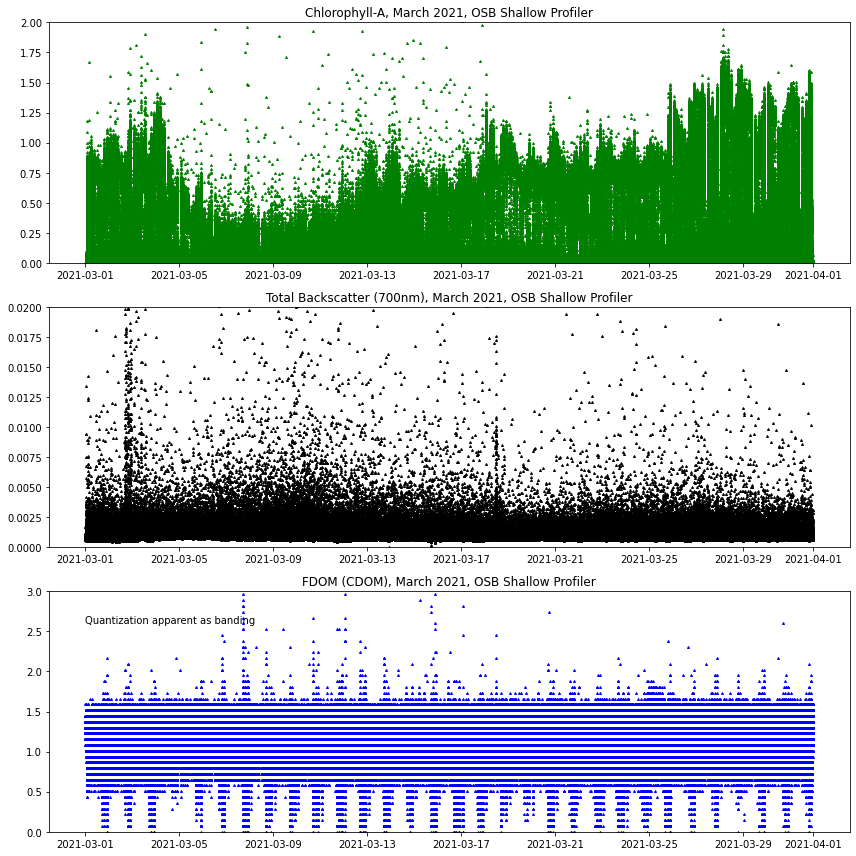

In [9]:
fig,axs=plt.subplots(3, figsize=(12,12), tight_layout=True)

axs[0].plot(D.time, D.chlora,       ms=2., marker='^', linestyle='None', color='g')
axs[1].plot(D.time, D.backscatter,  ms=2., marker='^', linestyle='None', color='k')
axs[2].plot(D.time, D.fdom,         ms=2., marker='^', linestyle='None', color='b')


axs[0].set(ylim=(0.0, 2.0), title='Chlorophyll-A, March 2021, OSB Shallow Profiler')
axs[1].set(ylim=(0.0, .02), title='Total Backscatter (700nm), March 2021, OSB Shallow Profiler')
axs[2].set(ylim=(0.0, 3.0), title='FDOM (CDOM), March 2021, OSB Shallow Profiler')

axs[2].text(dt64('2021-03-01'), 2.6, 'Quantization apparent as banding')

fig.show()

### Reduce data time range to one day: 10-MAR-2021

In [11]:
D = D.sel(time=slice(dt64('2021-03-10'), dt64('2021-03-11')))

In [12]:
# save
# df = D.to_dataframe()     # just under 72k rows by 43 columns; revise with [[]] notation to reduce column count
# df = df.to_csv('BioOptics_Figure1_2021_03_10_72k_rows_by_43_columns.csv')

Text(2021-03-10, 2.6, 'Banding due to sensor quantization')

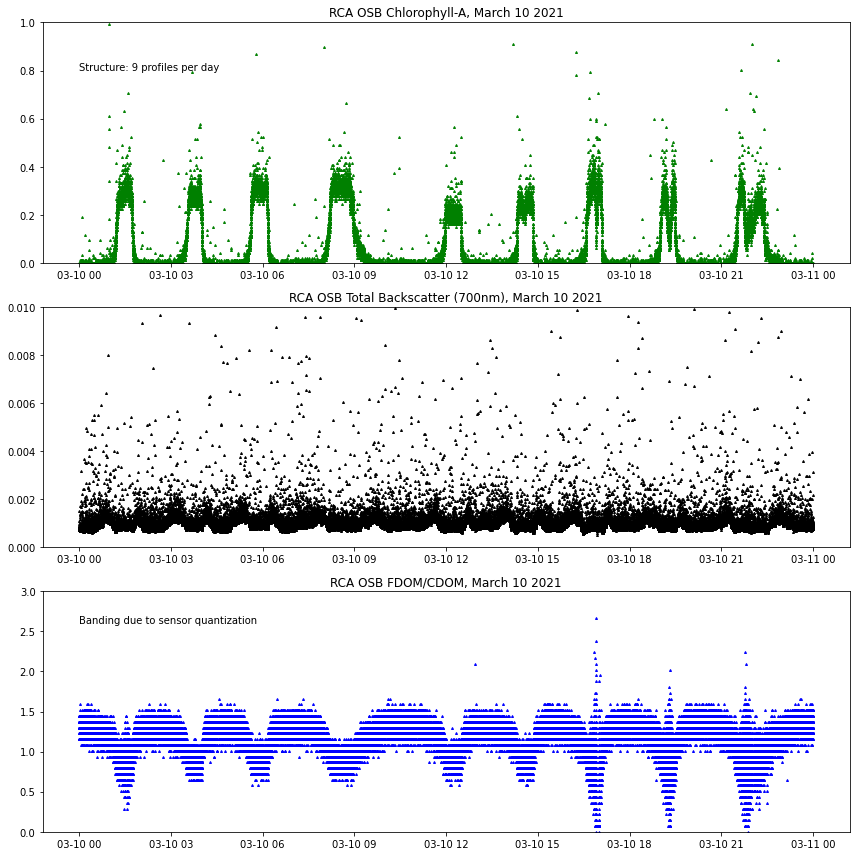

In [14]:
fig,axs=plt.subplots(3, figsize=(12,12), tight_layout=True)

axs[0].plot(D.time, D.chlora,       ms=2., marker='^', linestyle='None', color='g')
axs[1].plot(D.time, D.backscatter,  ms=2., marker='^', linestyle='None', color='k')
axs[2].plot(D.time, D.fdom,         ms=2., marker='^', linestyle='None', color='b')


axs[0].set(ylim=(0.0, 1.0), title='RCA OSB Chlorophyll-A, March 10 2021')
axs[1].set(ylim=(0.0, .01), title='RCA OSB Total Backscatter (700nm), March 10 2021')
axs[2].set(ylim=(0.0, 3.0), title='RCA OSB FDOM/CDOM, March 10 2021')

axs[0].text(dt64('2021-03-10'), 0.8, 'Structure: 9 profiles per day')
axs[2].text(dt64('2021-03-10'), 2.6, 'Banding due to sensor quantization')

### Remark: sample timing

The 'observation' coordinate is a simple counter. The 'time' coordinate/dimension consists of timestamps.
Time is the preferred dimension if multiple source data files come in to play as the ensemble is sortable
(whereas observation indices will be degenerate).


### Remark: QC flags


OOI QC or Quality Control flags are used to identify potential issues in time series data.
This primary reference is an online
[OOI guide to QC flags](https://oceanobservatories.org/knowledgebase/interpreting-qc-variables-and-results/). 


As an example for fluorometer data, the qc flag value for `fluorometric_cdom_qc_executed`
has value 29. This is interpreted as binary flags (right to left: `0b11101`) indicating
which tests have been applied to the stream data; hence tests 1, 3, 4 and 5 were completed. 
These are:

```
Bit 0: global_range_test
Bit 1: dataqc_localrangetest: Not completed
Bit 2: dataqc_spiketest
Bit 3: dataqc_polytrendtest
Bit 4: dataqc_stuckvaluetest
Bit 5: dataqc_gradienttest: Not completed
```

The corresponding QC flag `fluorometric_cdom_qc_results` indicates test *results*.

In [19]:
print('Decimal and binary cdom_qc_executed flag vlue:', 
      int(D.fluorometric_cdom_qc_executed[0]), 'or',
      bin(int(D.fluorometric_cdom_qc_executed[0])))

Decimal and binary cdom_qc_executed flag vlue: 29 or 0b11101


## Figure 2: Drop bad data


- global range test (part of QC flags): Is implemented here
- human in the loop (HITL): Is implemented but has no impact on the March 2021 dataset
- quality assurance for real-time OOI data (QARTOD): Is identified here but not implemented


Quality Control (QC) flags are included in the dataset on a sample-by-sample basis. 
The QC filter of interest here is the 'global range test' (bit 0 in the above remark). 


Human In The Loop (HITL) data are available through an `annotations.csv` file.


QA for Real Time OOI Data (QARTOD) are deferred at this time (2022). 


### Remark: FDOM/CDOM spikes


Spikes appear in the RCA OSB FDOM/CDOM data for March 2021, as shown in the 
example below for March 10. The global_range_test `_results` QC flag 
(the lowest order bit) is used to drop this spurious data.

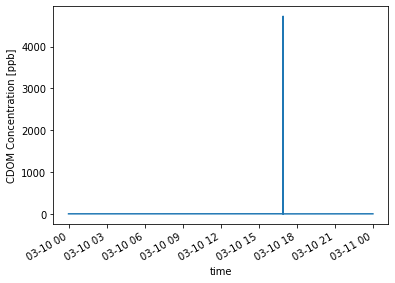

In [23]:
D.fdom.plot()

In [25]:
# '% 2' is modulo 2, i.e. if low order bit is set
DA = D.where(D.fluorometric_chlorophyll_a_qc_results % 2, drop=True)
DB = D.where(D.optical_backscatter_qc_results % 2,        drop=True)
DC = D.where(D.fluorometric_cdom_qc_results % 2,          drop=True)

In [26]:
# save
# actually used:
# df = DC[['fdom']].to_dataframe()     # just under 72k rows by 5 columns
# df = df.to_csv('BioOptics_Figure2B_2021_03_10_72k_rows_by_5_columns.csv')

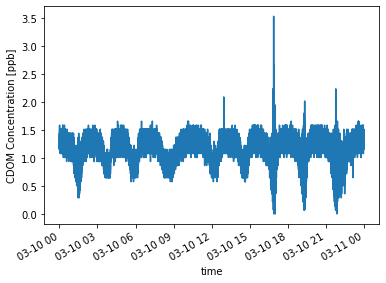

In [27]:
DC.fdom.plot()           # shows the egregious spike above has been dropped

A dual 'before/after' comparison chart is produced below.

Text(2021-03-10, 3.5, 'Data range 0 - 4')

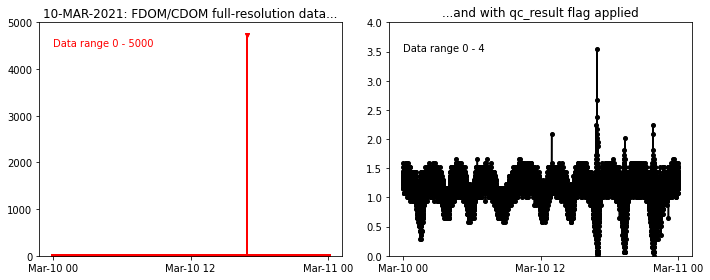

In [30]:
time_ticks = [dt64('2021-03-10'), dt64('2021-03-10 12'), dt64('2021-03-11')]

fig, axs = plt.subplots(1, 2, figsize=(10,4), tight_layout=True)

axs[0].plot(D.time, D.fdom,  ms=4., marker='v', color='r')
axs[1].plot(DC.time, DC.fdom,  ms=4., marker='o', color='k')

axs[0].set(ylim=(0.0, 5000.), title='10-MAR-2021: FDOM/CDOM full-resolution data...')
axs[1].set(ylim=(0.0, 4.0),   title='...and with qc_result flag applied')

axs[0].xaxis.set_ticks(time_ticks)
axs[1].xaxis.set_ticks(time_ticks)
           
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%d %H'))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%d %H'))

axs[0].text(dt64('2021-03-10'), 4500, 'Data range 0 - 5000', color='r')
axs[1].text(dt64('2021-03-10'), 3.5, 'Data range 0 - 4', color='k')

### Remark: Other QC flags

The other QC tests (higher order bits in the `_qc_results` flag) indicate data *of interest*. 
These flags are not used to *drop* additional data. 

### Human In The Loop (HITL) annotation data


The OOI Data Explorer provides 
[annotation files](https://dataexplorer.oceanobservatories.org/#metadata/104289/station/187/sensor/annotations)
(CSV format) that can be used to interpret time-series data for specific arrays. 
These are spreadsheets that include date ranges and commentary.


The code below reads an `annotations` file specific to the RCA.
Owing to small file size this file has been located within this
repository. Date ranges are scanned 
to identify overlaps with a date range of interest, e.g. March 2021. 
When no overlaps are found, no action is taken. A date range scan 
from 2019 does turn up two annotation overlaps; so further
investigation is suggested in that case. 

In [40]:
def CheckHITL(f, t1, t2):
    annot, found_overlap, overlap_rows = pd.read_csv(f), False, []
    for i in range(annot.shape[0]):
        if TimeOverlap(t1, t2, dt64(annot['beginDate'][i]), dt64(annot['endDate'][i])):
            found_overlap = True; overlap_rows.append(i)
    if found_overlap: 
        print('\n', len(overlap_rows), "time overlaps: annotations vs time range of interest. Rows:", overlap_rows)
        for i in range(len(overlap_rows)):
            print('      ', annot['beginDate'][overlap_rows[i]], ' to ', annot['endDate'][overlap_rows[i]])
        print()
    else: print("\nNo overlap between annotation record and time range of interest.\n")

print("2021")
CheckHITL('./HITLAnnotations/annotations_rca.csv', dt64('2021-03-01'), dt64('2021-04-01'))
print("\n2019")
CheckHITL('./HITLAnnotations/annotations_rca.csv', dt64('2019-03-01'), dt64('2019-09-01'))
print()

2021

No overlap between annotation record and time range of interest.


2019

 2 time overlaps: annotations vs time range of interest. Rows: [22, 29]
       2019-08-10T14:42:54  to  2019-08-24T08:45:45
       2019-06-24T19:03:08  to  2019-07-12T10:06:48




### Remark: Examining the 'annotations' data frame

The `annotations` CSV file is read into a pandas data frame. The dimensions 
of this data frame are given by `print(annot.shape)`. The cells below illustrate
remarks of interest.

In [70]:
print(annot.iloc[22]['annotation'])
print()
print(annot.iloc[29]['annotation'])

In August 2019 the platform experienced another major blow down event (~30 m deep), most likely due to strong currents. There was no indication of damage or other issue that could have caused the shift in location.

Following the 2019 deployment, the platform experienced a several-day, major blow down event (350 m west, 48 m deep), most likely due to strong currents. The platform and profiler pod were inspected by the Jason ROV, but there was no visual indication of damage or other issue that could have caused the shift in location.


The following code simplifies the datasets by dropping everything but the specified Data Variables.
Coordinates including `depth` and `time` are retained.

In [74]:
DA = DA[['chlora']]
DB = DB[['backscatter', 'seawater_scattering_coefficient']]
DC = DC[['fdom']]

In [77]:
# save
# df = D.to_dataframe()     # just under 72k rows by 43 columns; revise with [[]] notation to reduce column count
# df = df.to_csv('BioOptics_Figure1_2021_03_10_72k_rows_by_43_columns.csv')

## Figure 3: Manual Intervention

The following code applies median and mean filters to Chlor-A data to reduce noise.

In [75]:
DA_median_20S = DA.resample(time='20S').median()
DA_mean_20S   = DA.resample(time='20S').mean()

In [ ]:
# save
# df = DA.to_dataframe()
# df = df.to_csv('BioOptics_Figure3_2021_03_10_100_minutes_source.csv')
# df = DA_median_20S.to_dataframe()
# df = df.to_csv('BioOptics_Figure3_2021_03_10_100_minutes_median_filter_20S.csv')
# df = DA_mean_20S.to_dataframe()
# df = df.to_csv('BioOptics_Figure3_2021_03_10_100_minutes_mean_filter_20S.csv')

Text(2021-03-10T08:24, 0.16, 'Mean filter (20 seconds): magenta')

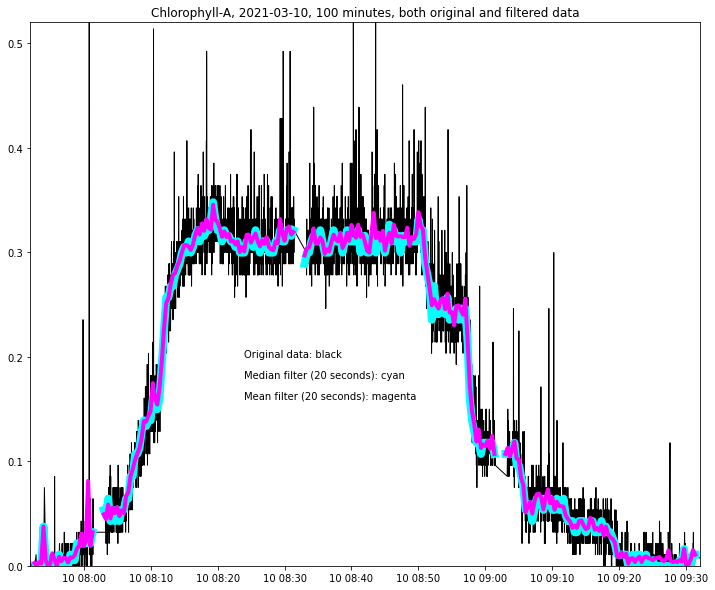

In [76]:
fig,ax=plt.subplots(figsize=(12,10))
ax.plot(DA.time, DA.chlora, color='k', lw=1)
ax.plot(DA_median_20S.time, DA_median_20S.chlora, color='cyan', lw=8)
ax.plot(DA_mean_20S.time, DA_mean_20S.chlora, color='magenta', lw=4)
ax.set(ylim=(-0.0, 0.52), xlim=(dt64('2021-03-10 07:52'), dt64('2021-03-10 09:32')), title='Chlorophyll-A, 2021-03-10, 100 minutes, both original and filtered data')
ax.text(dt64('2021-03-10 08:24'), 0.2, 'Original data: black', color='k')
ax.text(dt64('2021-03-10 08:24'), 0.18, 'Median filter (20 seconds): cyan', color='k')
ax.text(dt64('2021-03-10 08:24'), 0.16, 'Mean filter (20 seconds): magenta', color='k')

## Figure 4: Particulate backscatter

Calculated seawater scattering coefficient resides in the dataset. 
This is derived by OOI using temperature and salinity. 
Particulate backscatter is equal to the total backscatter less this seawater 
scattering coefficient. In terms of pseudo-code we have: 


```
Total optical backscatter ('bb', 700 nm) is an OOI level 2 product
Seawater backscatter coefficient is provided in this data product as well

FOR i: over bb values of interest, e.g. a time series
    seawater backscatter coefficient bb_sw(T, S) provided
    particulate backscatter bb_p(i) = bb(i) - bb_sw(i)
```

In [78]:
# Uses the Python lambda 'simple anonymous function' construction
DB = DB.assign(particulate = lambda DB: DB.backscatter - DB.seawater_scattering_coefficient)

In [ ]:
# save
# df = DA.to_dataframe()
# df = df.to_csv('BioOptics_Figure3_2021_03_10_100_minutes_source.csv')

In [81]:
DB_micro = DB.sel(time=slice(dt64('2021-03-10 06:12'), dt64('2021-03-10 06:16')))

In [82]:
# save
# df = DB_micro.to_dataframe()
# df = df.to_csv('BioOptics_Figure4_2021_03_10_4_minutes.csv')

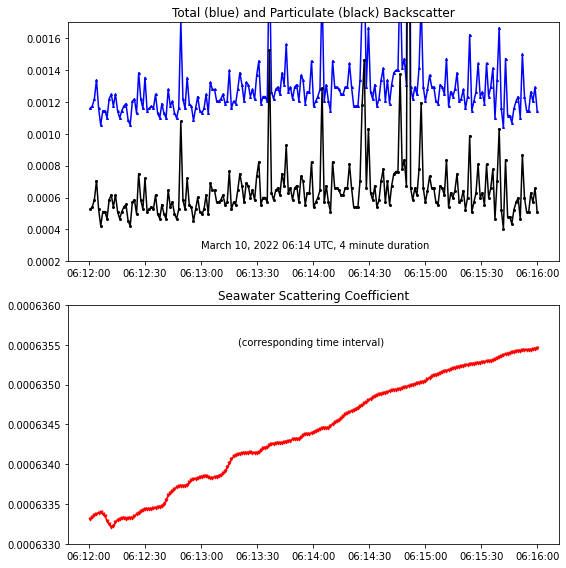

In [84]:
fig,axs=plt.subplots(2, figsize=(8,8), tight_layout=True)

axs[0].plot(DB_micro.time, DB_micro.backscatter,                     ms=2., marker='^', linestyle='-', color='b')
axs[0].plot(DB_micro.time, DB_micro.particulate,                     ms=2., marker='o', linestyle='-', color='k')
axs[0].set(ylim=(0.0002,     0.0017  ), title='Total (blue) and Particulate (black) Backscatter')

axs[1].plot(DB_micro.time, DB_micro.seawater_scattering_coefficient, ms=3., marker='v', linestyle='-', color='r')
axs[1].set(ylim=(0.000633,  0.000636 ), title='Seawater Scattering Coefficient')

axs[0].text(dt64('2021-03-10 06:13'), .00028, 'March 10, 2022 06:14 UTC, 4 minute duration')
axs[1].text(dt64('2021-03-10 06:13:20'), .0006355, '(corresponding time interval)')

fig.show()

#    ds_1day = ds.sel(time=slice(dt64(t0str), dt64(t1str)))   
#    fig, axs = plt.subplots(figsize=(12,4), tight_layout=True)   
#    axs.plot(ds_1day.time, ds_1day.z, marker='.', ms=9., color='k', mfc='r')   
#    axs.set(ylim = (-200., 0.), title=title)
#    axs.text(dt64('2021-02-28 23:15'), -184, 'AT')

## Figure 5: Profiler Chlor-A dark correction

### Technical basis


Chlorophyll-A dark correction amounts to removing a constant bias from the data. 
This bias may be positive or negative and indicates a *de facto* non-zero signal
when it is assumed there is no fluorescing chlorophyll-a pigment to fluoresce.


Profiler data at depth -- say from some time interval within a deployment -- 
is used for dark bias calculation. This bias can be
subtracted from data for longer periods, up to the full instrument deployment. 


The code here proceeds in three phases: Aggregate, Estimate and Apply.


- Aggregate: Identify a small set (between 5 and 10) of correction profiles
- Estimate: Arrive at the constant bias from the correction profiles
- Apply: Subtract the bias from a larger set of profiles


Correction profiles extend 100 or more meters below the productive layer; which
is defined in *ad hoc* manner in what follows.



### Part 1: Aggregate


```
Loop over Profiles, index i
    max_z[i] = max depth, this profile
    max_chlora_z[i] = depth of chlorophyll maximum, this profile
    max_chlora[i] = chlorophyll max, this profile
    productive_layer_depth[i] = minimum z where:
                                    (z > max_chlora_z[i]) and
                                    (chlorophyll <= 0.1 x max_chlora[i])


Define an empty list: correction_profiles

To populate this list: Loop over profiles, index i
    if max_z[i] - productive_layer_depth[i] >= 100 meters:
        append profile i to the correction_profiles list        
```


### Part 2: Estimate


```
If number of correction profiles is less than 5: 
    ...insufficient basis; halt...
    
Loop over correction_profiles, index i
     chlorophyll_minima[i] = min(correction_profiles[i])

dark_correction = median(chlorophyll_minima)
dark_correction_standard_deviation = std(chlorophyll_minima)

Verify that the resulting correction values are self-consistent
```


### Part 3: Apply


```
Loop over all data of interest
    chlorophyll_dark_corrected = original_chlorophyll - dark_correction
```

In [98]:
#
# Part 1: Aggregate candidate data
# Use 'p' on a line by itself to view the profile Dataframe. This catalogs start/stop times
#   for Oregon Slope Base Shallow Profiler ascents from 2021. 
#

# Reload Dataset D as full month of March 2021, RCA OSB shallow profiler
D = xr.open_dataset('../data/rca/fluor/osb/2021/flort_fullres.nc')
D = D.swap_dims({'obs':'time'})
D = D.sel(time=slice(dt64('2021-03-01'), dt64('2021-04-01')))
D = D.dropna('time')
D = D.rename( {'fluorometric_cdom':          'fdom',
               'fluorometric_chlorophyll_a': 'chlora',
               'optical_backscatter':        'backscatter'})

# already saved

In [99]:
def ProfileListFromTimeWindow(t1, t2):
    n = p.shape[0]
    plist = []
    for i in range(n):
        if p['ascent_start'][i] >= t1 and p['ascent_start'][i] <= t2: plist.append(i)
    return plist

def Ascent(ascent_start_time, ascent_end_time):
    '''
    Returns an XArray Dataset time-bounded by the ascent start and end times.
    These in turn are recovered from the 'p' or *profile* Dataframe by means of row indices.
    '''
    return D.sel(time=slice(ascent_start_time, ascent_end_time))

In [100]:
pl = ProfileListFromTimeWindow(dt64('2021-03-01'), dt64('2021-04-01'))
max_z, max_chlora_z, max_chlora, productive_layer_depth, correction_profiles = [], [], [], [], []

In [101]:
# Most profiles fit the candidate criteria so we scan only 20 or so
for i in pl[0:20]:

    # 'ascent' is a Dataset particular to a profiler ascent. The data are filtered to reduce
    #   intrinsic noise using 20-second windows (typically 16 samples)
    ascent = Ascent(dt64(p['ascent_start'][i]), dt64(p['ascent_end'][i])).resample(time='20S').mean() 
    
    if len(ascent.time): 
        this_max_z, this_max_chlora, this_max_chlora_z = 0., 0., 0.
        for j in range(len(ascent.time)):
            chlora, depth = float(ascent.chlora[j]), float(ascent.int_ctd_pressure[j])
            if chlora > this_max_chlora: this_max_chlora, this_max_chlora_z = chlora, depth
            if depth > this_max_z:       this_max_z = depth
        max_z.append(this_max_z)
        max_chlora.append(this_max_chlora)
        max_chlora_z.append(this_max_chlora_z)

        this_productive_layer_depth = 999999
        for j in range(len(ascent.time)):
            chlora, depth = float(ascent.chlora[j]), float(ascent.int_ctd_pressure[j])
            if depth < this_productive_layer_depth and depth > max_chlora_z[-1] and chlora <= 0.1 * max_chlora[-1]:
                this_productive_layer_depth = depth
                
        productive_layer_depth.append(this_productive_layer_depth)
        if max_z[-1] - productive_layer_depth[-1] >= 100: correction_profiles.append(i)

Results of the Aggregate step

In [102]:
print('depth of first profile (m):', round(max_z[0], 1))
print('...of the productive layer (m):', round(productive_layer_depth[0], 1))
print('max chlorophyll for entire profile (ug/l):', round(max_chlora[0], 4))
print('depth at chlorophyll max: (m)', round(max_chlora_z[0], 1))

depth of first profile (m): 190.9
...of the productive layer (m): 85.3
max chlorophyll for entire profile (ug/l): 0.8007
depth at chlorophyll max: (m) 31.9


In [103]:
#
# Part 2: Estimate the dark correction value
#

dark_value_sum = 0.
chlora_minima = []
for i in correction_profiles:
    this_profile = Ascent(dt64(p['ascent_start'][i]), dt64(p['ascent_end'][i])).resample(time='20S').mean()
    this_minimum = 999999.
    for j in range(len(this_profile.time)):
        chlora = float(this_profile.chlora[j])
        if chlora < this_minimum: this_minimum = chlora
    chlora_minima.append(this_minimum)

dark_correction = np.median(chlora_minima)
dark_correction_std = np.std(chlora_minima)
print('dark correction constant (std):', round(dark_correction, 4), '(', round(dark_correction_std, 4), ')')

dark correction constant (std): -0.033 ( 0.0015 )


In [104]:
#
# Part 3: Apply dark correction to the full month of data in Dataset 'D'
#

print('Example: First chlora value from March 2021:', round(float(D.chlora[0]), 4), 'where dark correction to be subtracted is', round(dark_correction, 4))
Ddark = D.copy(deep=True)                                   # make a completely independent (deep = True) copy of D
Ddark.chlora[:] -= dark_correction                          # subtract the dark_correction bias
print('result:', round(float(Ddark.chlora[0]), 4))          # demonstrate the result for the first chlorophyll value

Example: First chlora value from March 2021: -0.0107 where dark correction to be subtracted is -0.033
result: 0.0223


In [105]:
# save
#
#

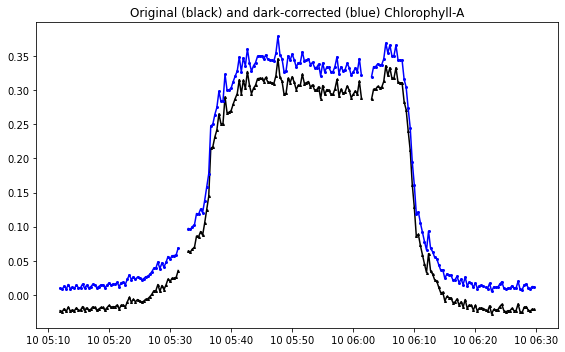

In [106]:
fig,ax=plt.subplots(figsize=(8,5), tight_layout=True)
D_hour_resampled     = D.sel(    time=slice(dt64('2021-03-10 05:12'), dt64('2021-03-10 06:30'))).resample(time='20S').mean() 
Ddark_hour_resampled = Ddark.sel(time=slice(dt64('2021-03-10 05:12'), dt64('2021-03-10 06:30'))).resample(time='20S').mean() 

ax.plot(D_hour_resampled.time, D_hour_resampled.chlora,         ms=2., marker='^', linestyle='-', color='k')
ax.plot(Ddark_hour_resampled.time, Ddark_hour_resampled.chlora, ms=2., marker='o', linestyle='-', color='b')
ax.set(title='Original (black) and dark-corrected (blue) Chlorophyll-A')

# axs[0].text(dt64('2021-03-10 06:13'), .00028, 'March 10, 2022 06:14 UTC, 4 minute duration')
# axs[1].text(dt64('2021-03-10 06:13:20'), .0006355, '(same time interval as above)')

fig.show()

## Figure 6: Discrete sample comparison


### Remark: Discrete data 


Discrete data refers to water samples collected and analyzed for comparison
with *in situ* instrumentation, such as we have with the shallow profiler. 
Owing to logistical issues this analysis will be done using data from 2018.


#### Rosette casts during RCA VISIONS maintenance cruises

- RCA VISIONS cruise CTD casts near instrument sites
- Niskin bottle discrete samples trigger on ascent ('upcast') at a sequence of depths
    - [Rosettes](https://www.whoi.edu/what-we-do/explore/instruments/instruments-sensors-samplers/rosette-sampler/) support continuous measurements as well (1 sample / second)
- Discrete Summary files: CSV tables 
    - From the dedicated 'Alfresco' server; includes excerpted fluorometer data
    - [Alfresco browse site](https://alfresco.oceanobservatories.org/alfresco/faces/jsp/browse/browse.jsp)
        - Navigate: Cabled array > Cruise data > (year of choice) > Ship Data > Water Sampling
        - Example: **`Cabled-12_TN393_2021-07-30`**
        - TN: Thompson. AT: Atlantis. RR: Revelle. SKQ: Sikuliaq (2016)
        - 393: cruise number
        - Cabled-12: OOI Regional Cabled Array; 12 is an arbitrary index
        - OOI RCA background: 
            - VISIONS cruises use Newport OR as base of operations
            - Cruise is a series of four or five sorties or 'legs', each typically 5-10 days
            - 2021-07-30 is the cruise start date
        - In the Water Sampling folder:
            - **Cabled-12_TN393_Discrete_Summary-README.pdf** is the Users Guide
            - **Cabled-12_TN393_Discrete_Summary.csv** is the tabular **Discrete Summary**   
        - Cast reference site: **`SP`** is Shallow Profiler
        - Cast sequence: **`CTD-005`** is a CTD cast by index (skips are common)
        - Cast location: **`500m SW`** indicates an offset southwest (SW) from the SP position
    - **`DiscreteSummaries`** folder contains tabular data and metadata: 2015 - 2021
- By year: VISIONS casts near OSB SP
    - 2014--2017: None
    - 2018
        - CTD-002, 2018-06-26T20:23Z, 500m W
            - SP deployed Aug 4, 2017 through Jun 24, 2018 02:00Z
                - 2 days 18 hrs after SP stop
        - CTD-006, 2018-07-10T20:46Z, 250m W
        - CTD-008, 2018-07-10T22:44Z, 500m W (rapid succession)
            - SP deployed "briefly" Jun 24, 2018 through Jul 9, 2018 12:00Z
                - 34 hours after SP deployment
    - 2019
        - CTD-006, 2019-06-14T11:24Z,  250m W
            - SP deployed Jul 9, 2018 through Jun 14, 2019 05:26Z
                - The cast above on June 14 is 6 hours after SP stop (good candidate)
        - CTD-010, 2019-06-27T19:38Z,  250m W
    - 2020
        - CTD-001, 2020-08-03T15:18Z,    0m
            - SP deployed Jun 14, 2019 through Aug 2, 2020 19:41Z
                - The cast above on Aug 3 is 19 hours after SP stop
        - CTD-006, 2020-08-11T04:28Z, 1300m NE
        - CTD-007, 2020-08-11T05:48Z, 1300m NE
    - 2021
        - CTD-005, 2021-08-06T01:44Z, 500m SW
            - Aug 3, 2020 through Aug 4, 2021 20:20Z
                - The cast above on Aug 6 is 30 hours after SP stop

### Discrete Summary table column headers 

Column headers include:

```
Cruise, Station, Start Time [UTC], Cast;
    CTD Bottle Closure Time [UTC], CTD Depth [m];
    CTD Temperature 1 [deg C], CTD Temperature 2 [deg C];
    CTD Conductivity 1 [S/m], CTD Conductivity 2 [S/m];
    CTD Salinity 1 [psu], CTD Salinity 2 [psu];
    CTD Oxygen [mL/L];
    CTD Fluorescence [mg/m^3];
    CTD Beam Attenuation [1/m], CTD Beam Transmission [%];
    CTD pH;
    Discrete Oxygen [mL/L];
    Discrete Chlorophyll [ug/L];
    Discrete Nitrate [uM]
```

The modifier `CTD` indicates a continuously-running sensor affixed to the rosette frame. 
The modifier `Discrete` indicates an analysis of water recovered from a Niskin bottle. 
Below we include both `CTD Fluorescence` and `Discrete Chlorophyll` in comparison with
the Chlorophyll-A recorded by the shallow profiler. 


Cast CTD-002 is chosen, corresponding to three days after the end of the OSB SP 
deployment. (Full Discrete Summary table is 169 x 80.) The CTD-002 cast has 
17 depths (bottle closures) from 222 to 13 meters. However of these 17 only 7 
include a Chlor-A lab measurement.

In [108]:
# Read the Discrete Summary (CSV) table for Regional Cabled Array 2018

Discrete2018 = pd.read_csv('./DiscreteSummaries/RCA2018_RR_DiscSumm.csv')
Discrete002 = Discrete2018[Discrete2018["Cast"] == "CTD-002"]

# Additional OSB SP casts:
#   Discrete006 = Discrete2018[Discrete2018["Cast"] == "CTD-006"]
#   Discrete008 = Discrete2018[Discrete2018["Cast"] == "CTD-008"]
# Examine column headers:
#   Discrete002.keys()
# Depths/data for this cast: 
#   Discrete002['CTD Depth [m]'], Discrete002["Discrete Chlorophyll [ug/L]"]

In [30]:
D002_time            = Discrete002["CTD Bottle Closure Time [UTC]"]
D002_depth           = Discrete002["CTD Depth [m]"]                             # runs 200 ... 11 meters
D002_fluor           = Discrete002["CTD Fluorescence [mg/m^3]"]
D002_chlor           = Discrete002["Discrete Chlorophyll [ug/L]"]
D002_disc_fluor_flag = Discrete002["Discrete Fluorescence Flag"]
D002_disc_fluor_repl = Discrete002["Discrete Fluorescence Replicate Flag"]

Inspection code

```
# Depths and data values for the CTD-002 cast:
#     print(D002_depth, '\n', D002_fluor, '\n', D002_chlor)
#
# Corresponding Niskin bottle closure times:
#     print(D002_time)
#         1:  2018-06-26T20:42:14.000Z
#         17: 2018-06-26T21:02:44.000Z
```

- 2018 Oregon Slope Base comparison: Discrete samples relative to shallow profiler
    - Discrete Chlorophyll is the 'apples to apples' comparison
    - CTD Fluorescence is a potential source of comparison
- CTD-002 is the cast closest in time to an OSB SP profile  
    - Cast at 2018-06-26T20:23Z, 500m West of SP site
    - SP ascent start to descent end 2018-06-26 20:42:00 -- 2018-06-26 23:24:00
- Discrete Depths: (m) `182, 162, 82, 62, 42, 23, 13`: (ug/L) `0.025, 0.087, 0.030, 0.208, 0.483, 0.167, 0.103`
- CTD Depths (m): `222.098, 202.454, 181.966, 182.197, 162.401, 162.053, 141.856, 142.452, 121.544, 102.720, 82.232, 62.311, 42.482, 42.396, 22.990, 12.959, 13.200`
    - Data (mg/m^3): `0.0684, 0.0682, 0.0670, 0.0678, 0.0677, 0.0682, 0.0673, 0.0670, 0.0697, 0.0828, 0.2010, 0.6560, 1.9600, 1.8900, 0.3510, 0.2220, 0.2280`


In [110]:
p = ReadProfileMetadata('./Profiles/osb2018.csv')
p['ascent_start'][617], p['descent_end'][617]

(Timestamp('2018-06-26 20:42:00'), Timestamp('2018-06-26 23:24:00'))

In [133]:
D = xr.open_dataset('../data/rca/fluor/osb/2018/flort_fullres.nc')
D = D.swap_dims({'obs':'time'})
D = D.dropna('time')
D = D.rename( {'fluorometric_cdom':          'fdom',
               'fluorometric_chlorophyll_a': 'chlora',
               'optical_backscatter':        'backscatter'})

print('N-Data for the 2018 RCA OSB SP data: ', len(D.time))
print('\nComparative context:\n')
print()
print('SP operational time range: 24-JUN-2018 UTC 17 hours to 09-JUL-2018 UTC 0 hours')
print('                 More precisely:', D.time[0].data, D.time[-1].data)
print('SP profile time: Ascent start 26-JUN-2018 UTC 20 Hours 42 minutes')
print('                 Descent end  26-JUN-2018 UTC 23 Hours 24 minutes')
print('                   This is a typical noon extended-duration profile')
print('Corresponding CTD-002 cast begins 26-JUN-2018 UTC 20 Hours 23 minutes')
print('                 This is effectively simultaneous with the SP profile')
print()

N-Data for the 2018 RCA OSB SP data:  1029224

Comparative context:


SP operational time range: 24-JUN-2018 UTC 17 hours to 09-JUL-2018 UTC 0 hours
                 More precisely: 2018-06-24T16:49:59.587803136 2018-07-09T00:13:01.575661056
SP profile time: Ascent start 26-JUN-2018 UTC 20 Hours 42 minutes
                 Descent end  26-JUN-2018 UTC 23 Hours 24 minutes
                   This is a typical noon extended-duration profile
Corresponding CTD-002 cast begins 26-JUN-2018 UTC 20 Hours 23 minutes
                 This is effectively simultaneous with the SP profile



The OOI Data Explorer view of OSB SP data availability is [here](https://dataexplorer.oceanobservatories.org/#metadata/104289/station/187/sensor/data?start=2018-06-24T06:56:38Z&end=2018-07-01T00:25:27Z).
From this view we have the following sequence of operational intervals:
```
JUN 24: 16:00 to JUN 24: 24:00 (about six profiles)
JUN 25: 14:00 to JUN 28: 02:00
JUN 28: 16:00 to JUN 29: 24:00
JUN 30: 11:00 to JUN 30: 13:00 (one profile)
JUL 10: 17:00 to JUL 13: 23:00
JUL 14: 05:00 to AUG 10: 21:00
```

The full-resolution dataset has a time range from JUN 24 16:50 to JUL 09 00:13 UTC. 
From July 7 or earlier the only depth variability is tidal: The profiler is parked
at about 167 meters. 


In [66]:
t0, t1 = p['ascent_start'][617], p['descent_end'][617]
print('                         ', t0, t1)
t0, t1 = dt64('2018-06-26 20:42'), dt64('2018-06-26 23:36')
print('slight manual adjustment:', t0, '  ', t1)
d2018 = D2018.sel(time=slice(t0, t1))    

d2018A = d2018.where(d2018.fluorometric_chlorophyll_a_qc_results % 2, drop=True)      # qc_results flag applied

# Drop all Data Variables except those of interest ('chlora' and so on)
d2018A = d2018A[['chlora']]                         

print('N samples: source data and then post-qc-discards for chlor-a:', 
      len(d2018.time), '->', len(d2018A.time))

# print(d2018A.time[0], d2018A.time[-1])

                          2018-06-26 20:42:00 2018-06-26 23:24:00
slight manual adjustment: 2018-06-26T20:42    2018-06-26T23:36
N samples: source data and then post-qc-discards for chlor-a: 8681 -> 8681


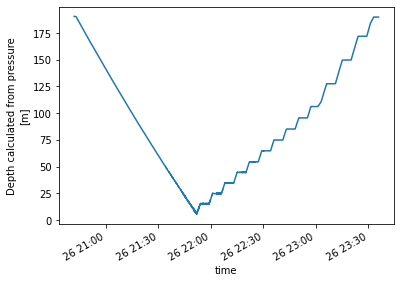

In [58]:
d2018A.depth.plot()

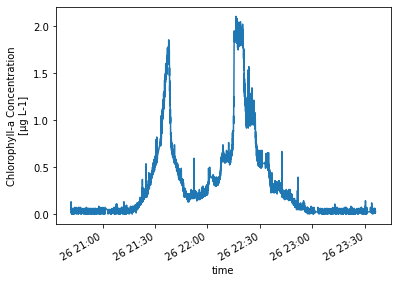

In [59]:
d2018A.chlora.plot()

In [67]:
print(list(np.arange(0.1, 0.7, 0.05)))

[0.1, 0.15000000000000002, 0.20000000000000004, 0.25000000000000006, 0.30000000000000004, 0.3500000000000001, 0.40000000000000013, 0.45000000000000007, 0.5000000000000001, 0.5500000000000002, 0.6000000000000002, 0.6500000000000001]


In [55]:
# Bin results by depth for comparison with discrete (cast) data

depth_bounds = [0., 15., 30., 50., 70., 90., 110., 130., 150., 170., 190., 250.]    
depth_labels = [10., 20., 40, 60., 80., 100., 120., 140., 160., 180., 200.]

# depth_bounds = np.arange(0., 217., 6.)  
# depth_labels = np.arange(3., 215., 6.)

chlora_binned      = d2019A.sortby('depth').groupby_bins('depth', depth_bounds, labels=depth_labels).mean()
chlora_std      = d2019A.sortby('depth').groupby_bins('depth', depth_bounds, labels=depth_labels).std()


2018-06-26 20:42:00 2018-06-26 21:51:00


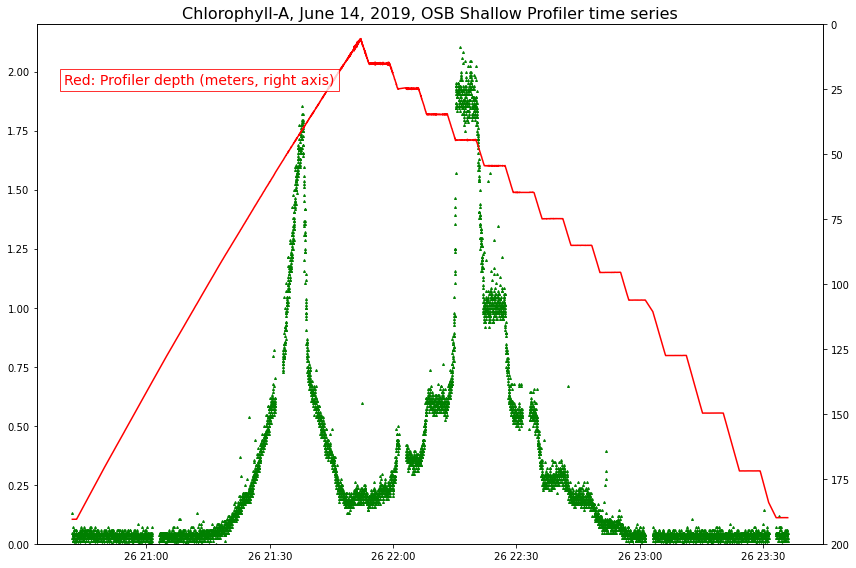

In [56]:
# Time series charts for June 14, 2019: 3 hours spanning the final profile of the deployment
#   prior to a maintenance update.

fig,ax=plt.subplots(figsize=(12,8), tight_layout=True)

ax.plot(d2018A.time, d2018A.chlora, ms=2., marker='^', linestyle='None', color='g')
axtwin = ax.twinx()

axtwin.plot(d2018A.time, d2018A.depth, markersize = 4., color='red')
axtwin.set(ylim = (200, 0))
text_object = axtwin.text(dt64('2018-06-26 20:40'), 23, 'Red: Profiler depth (meters, right axis)', color='red', fontsize=14)
text_object.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='red'))

ax.set(ylim=(0.0, 2.2))

ax.set_title('Chlorophyll-A, June 14, 2019, OSB Shallow Profiler time series', fontsize=16)

fig.show()

In [34]:
# Bin results by depth for comparison with discrete (cast) data

depth_bounds = [0., 18., 32., 52., 72., 92., 112., 132., 152., 172., 192., 212., 232.]    
depth_labels = [10., 25., 42., 62., 82., 102., 122., 142., 162., 182., 202., 222.]

# depth_bounds = np.arange(0., 217., 6.)  
# depth_labels = np.arange(3., 215., 6.)

chlora_binned      = d2018A.sortby('depth').groupby_bins('depth', depth_bounds, labels=depth_labels).mean()

chlora_std      = d2018A.sortby('depth').groupby_bins('depth', depth_bounds, labels=depth_labels).std()


In [ ]:
1     222.098
2     202.454
3     181.966
4     182.197
5     162.401
6     162.053
7     141.856
8     142.452
9     121.544
10    102.720
11     82.232
12     62.311
13     42.482
14     42.396
15     22.990
16     12.959
17     13.200